# Computer Science 2XC3 - Graded Lab II

Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow.

In [2]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math

Part 1: In class, we discussed a simple implementation of the undirected and non-weighted version of the graph. We also talked about the directed graph implementation where both the path between "src" and "dst" nodes is stored. We will also discuss how to search if a node exists in a graph using Breadth First Search (BFS) and Depth First Search (DFS). Using these techniques, the functions we discussed return True if the path exists between 2 nodes, otherwise it returns false. 

The implementation is limiting since not much can be accomplished with True and False. In this lab, implement two variations of BFS and DFS.

In [3]:
class GraphI:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def get_graph_size(self,):
        return len(self.graph)

    def get_graph(self,):
        return self.graph

In [4]:
class GraphII:

    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)

    def get_graph(self,):
        return self.graph

In [98]:
def depth_first_search(G,node,end_point=None):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            #print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:

                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    stack.append(nn)

In [99]:
#Breadth First Search
def breadth_first_search(G, node):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    seen.add(node)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        #print("Visiting node: " + str(node))
        if node in graph.keys():
            for nn in graph[node]:
                #if node == node2:
                #    return True
                if nn not in seen:
                    stack.append(nn)
                    seen.add(nn)

Part 1.1: Implement BFS2 and DFS2 where the path between two nodes node1 and node2 is returned as a
list. For instance, in a graph, if to reach node 8 from node 6, one needs to traverse the path starting at 6 to
23, to 12, then to 5, then to 10, and finally to 8, your function BFS2(graph, 6,8) (or DFS2(graph, 6,8) )
should return a list [6,23,12,5,10,8]. Implement both BFS2 and DFS2 for this variation.

In [100]:
# Using the given BFS code and modifying it

def bfs_2(G, src, dst):

    path_list = []

    stack = [src]
    graph = G.get_graph()
    seen = set()

    seen.add(src)

    path_list.append(src)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        # print("Visiting node: " + str(node))

        # Append node to new list if it hasn't been visited before
        if node not in path_list:
            path_list.append(node)
            # Return the list of nodes visited if the destination node is reached
            if node == dst:
                return path_list

        if node in graph.keys():
            for new_node in graph[node]:
                if new_node not in seen:
                    stack.append(new_node)
                    seen.add(new_node)
    return path_list

# Testing
# test_graph = GraphI([[0, 1], [1, 5], [1, 6], [5, 3], [5, 2], [5, 6], [6, 4], [6, 7]])
# test_graph.get_graph()
# # 0, 1, 5, 6, 2, 3, 4, 7
# bfs_2(test_graph, 0, 2)

In [101]:
# Using the given DFS code and modifying it

def dfs_2(G, src, dst, end_point=None):
    stack = [src]
    path_list = []
    graph = G.get_graph()
    seen = set()



    while len(stack) != 0:
        node = stack.pop()

        if node not in seen:
            seen.add(node)
            # print("Visited node: " + str(node))

            # Check if the visited node is already in path_list, and append it if not
            if node not in path_list:
                path_list.append(node)
                if node == dst:
                    return path_list

            if node in graph.keys():
                for new_node in graph[node]:
                    # Due to the given algorithm's limited implementation, it's possible for a dst node to be given that is in the graph but unreachable by the algorithm
                    if new_node == end_point:
                        return True
                    stack.append(new_node)

# Testing
# test_graph = GraphI([[1, 2], [2, 6], [6, 5], [6, 4]])
# dfs_2(test_graph, 2, 4)

Part 1.2:  In some applications, we need to find connections from a given node to all nodes. Think about
how one might find recommendations for possible connections on social media platforms. In this
variation implement BFS3 and DFS3 which take as an input 1 node and return paths to every other node
(note that this is different from all paths between all nodes. Your goal is to find a path to a node). These
paths should be returned as a “predecessor dictionary”. Predecessor dictionary contains the key as the
node and the value as the predecessor node. For example, for the following graph, your implementation of
BFS3(graph, 1) will return the predecessor dictionary as: {2 : 1, 3 : 1, 4 : 2, 5 : 3, 6 : 4}

In [5]:
#Using the given Breadth First Search algorithm and modifying it
def bfs_3(G, node):
    # Initializing predecessor dictionary
    pred_dict = {}
    graph = G.get_graph()

    stack = [node]
    seen=set()

    seen.add(node)


    while len(stack) > 0:

        node = stack[0]
        stack = stack[1:]
        print("Visiting node: " + str(node))


        if node in graph.keys():
            for new_node in graph[node]:

                #if node == node2:
                #    return True
                if new_node not in seen:
                    # If this node is new, it can be updated with the current node that's being iterated over
                    pred_dict[new_node] = node
                    stack.append(new_node)
                    seen.add(new_node)

    return pred_dict

# Testing
# test_graph = GraphI([[1, 2], [1, 3], [2, 4], [3, 4], [3, 5], [4, 5], [4, 6]])
# test_graph.get_graph()
# bfs_3(test_graph, 1)

In [103]:
# Using the given Depth First Search Algorithm and modifying it
def dfs_3(G,node,end_point=None):
    # Initializing predecessor dictionary
    pred_dict = {}
    stack = [node]
    graph = G.get_graph()
    seen=set()


    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            #print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for new_node in graph[node]:
                    # Similar to bfs_3 implementation:
                    if new_node not in pred_dict:
                        pred_dict[new_node] = node
                    # limited traversal
                    if new_node == end_point:
                        return True
                    # add to stack
                    stack.append(new_node)

    return pred_dict

# Testing
# test_graph = GraphI([[1, 2], [1, 3], [2, 4], [3, 4], [3, 5], [4, 5], [4, 6]])
# test_graph.get_graph()
# {1: [2, 3], 2: [4], 3: [4, 5], 4: [6], 5: [4]}

# dfs_3(test_graph, 1)

Part 1.3: Implement a function in the graph class called has_cycle( ) that computes and returns True if
the graph has a cycle.

In [104]:
# Since the depth_first_search algorithm given in the lab has a default "endpoint" parameter,
# We can use the DFS function on the node to see if there is a reachable path from that same node
def has_cycle(G):
    graph = G.get_graph()

    # Iterate through each node, calling the given DFS with the startpoint and endpoint parameter as that node
    for node in graph:
        result = depth_first_search(G, node, node)
        if result == True:
            return True

    # If all nodes in the graph return false from the DFS, it must mean that no cycles exist
    return False

# Testing
# test_graph = GraphI([[0, 1], [1, 2], [2, 3]])
# has_cycle(test_graph)

# test_graph = GraphI([[0, 1], [1, 2], [2, 0], [2, 3]])
# has_cycle(test_graph)

Part 1.4: Implement a function in graph class called is_connected( ) that computes and returns True if
there is a path between two nodes. Note that this is different from what we discussed in class ( has_edge()
). While has_edge finds whether an edge exists between two nodes, is_connected finds whether there is a
path between two nodes.
Feel free to use any part of the code here.

In [105]:
# Similar to Part 1.3, we can run DFS to check if a path can be found between the given startpoint and endpoint
def is_connected(G, startpoint, endpoint):
    graph = G.get_graph()

    for node in graph:
        value = depth_first_search(G, startpoint, endpoint)
        if value == True:
            return True

    return False

# Testing: Used graph example from Part 1.2, except added some disconnected nodes
# test_graph = GraphI([[1, 2], [1, 3], [2, 4], [3, 4], [3, 5], [4, 5], [4, 6], [7, 8]])
# is_connected(test_graph, 1, 8)

Part 1.5: In the previous lab we conducted a few experiments using a random list generator that I
provided. What would that look like for a graph? To experiment with graphs, you want to be able to
generate random graphs. Write a function to do so. The way to approach this is to think about the
essential elements of the graph nodes (n) and edges (e). So when you call the function
create_random_graph(n,e), it should create a random layout with only a single edge between two nodes.

In [106]:
import random

def random_graph(num_nodes: int, num_edges: int):
    # Create a list for edges of the graph
    random_edges = []

    # Using a count variable to ensure the correct number of edges are added with no duplicates
    count = 0

    while count != num_edges:
        # Generating random nodes
        node_1 = random.randint(0, num_nodes)
        node_2 = random.randint(0, num_nodes)

        # Checking for duplicates
        # There can only be a single edge between two nodes, so I need to check both combinations of nodes being an edge
        # The nodes can also not be the same
        if node_1 != node_2 and [node_1, node_2] not in random_edges and [node_2, node_1] not in random_edges:
            random_edges.append([node_1, node_2])
            # Count only increments if the edge is valid
            count += 1


    random_graph = GraphI(random_edges)
    return random_graph

# Testing
# test = random_graph(20, 20)
# test
# test.get_graph()

Part 1.6: By now, you should have a good understanding of how to design an experiment to answer a question. In this part, design an experiment to compute the probability of a graph having a cycle, when you generate a random graph with n nodes and e edges. This is an open-ended question so think about how you would design the experiment.

HINT: Create a sufficiently large number of graphs using a fixed number of nodes (or edges??). Compute for each graph, whether or not it has a cycle (you have already written this function in the previous section). Then calculate what proportion of the random graphs had cycles.

As usual, there are multiple ways you can approach this problem, so be creative. In your reflection, describe your experiment design, the number of iterations you ran, why you chose a specific experiment design etc. You can run this experiment multiple times and your graph should show the probability computed in each iteration. 

In [107]:
def draw_show_plot(run_arr):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize = (20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr), color = "red", linestyle="--", label = "Avg")
    plt.xlabel("Test #")
    plt.ylabel("Probability")
    plt.title("Probability")
    plt.show()

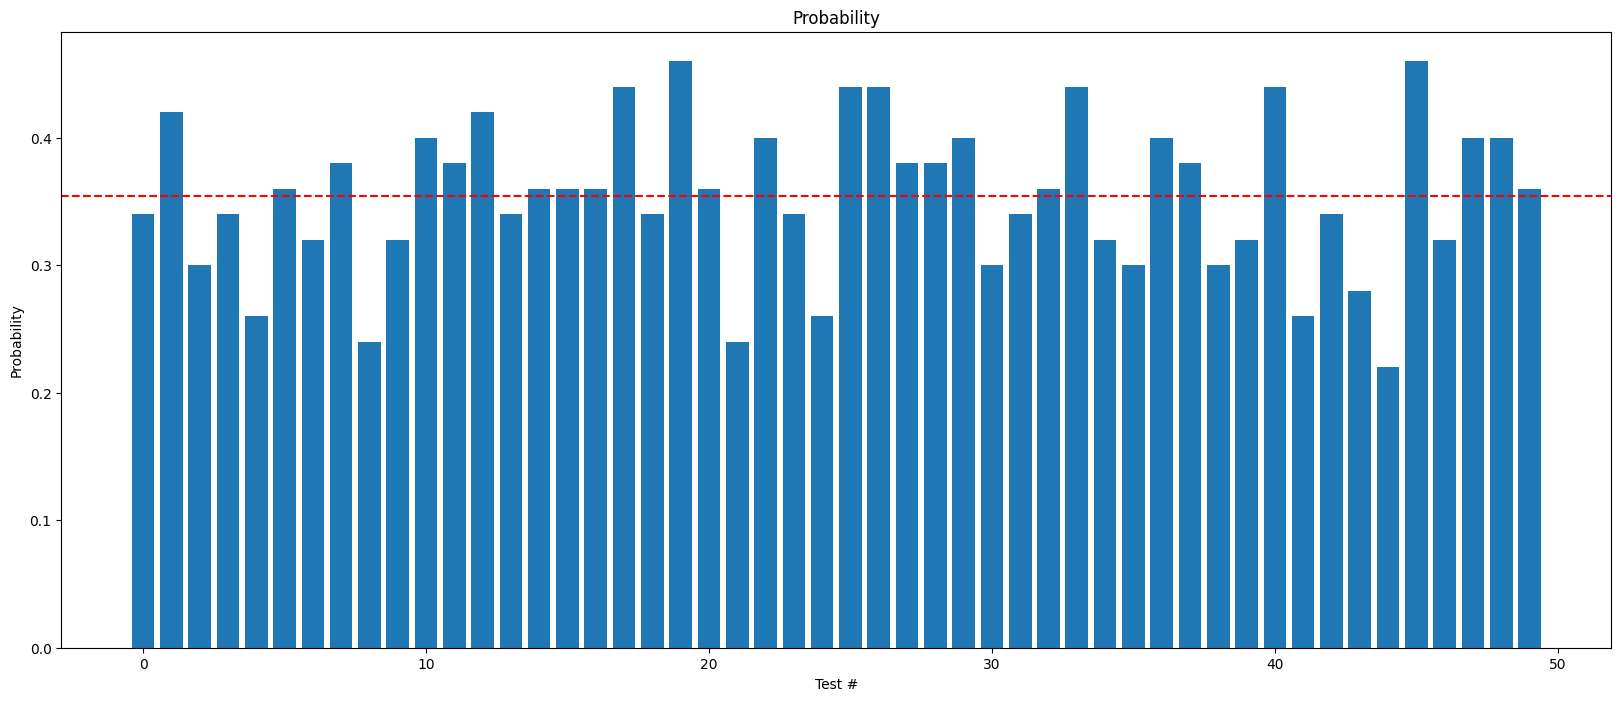

In [108]:
#1.6
#run the experiment 50 times (50 graphs will be tested, 50 times) each graph will have 20 nodes and 20 edges
runs = 50

#store the 50 probabilities in this list to make into a graph after
probabilities = []

for _ in range(runs):
  #x will be tracking how many graphs had cycles
  x = 0

  for _ in range(runs):
    G = random_graph(20, 20)
    cycle = has_cycle(G)
    if cycle:
      x += 1

  # print("The probability is", x, "/ 50 or", x/50)
  probabilities.append(x/50)
draw_show_plot(probabilities)



Reflection:

- The experiment design:
  - 50 times, a random graph is created with 20 nodes and 20 edges, and for each graph it's checked whether or not there's a cycle. At the end, the total number of graphs with cycles out of 50 is stored as the probability, and then the overall experiment is repeated 50 times to get 50 probabilities.

- In terms of iterations, as mentioned above the probability is found out of 50 graphs, and the probability is then found 50 times as it gives enough results to see what the average probability really is.

- This experiment design was chosen to ensure that enough graphs are tested and the experiment is repeated enough times to find a more accurate average probability.

- In this case the average probability of having a cycle in a random graph seems to be 0.36, which is around 18/50 graphs.

Part 1.7: Similar to Part 1.6 design an experiment to compute the probability of a graph being connected when you generate a random graph with n nodes and e edges. Again, you can use a similar strategy and describe in your reflection your experiment design, and number of experiments and justify your choices.

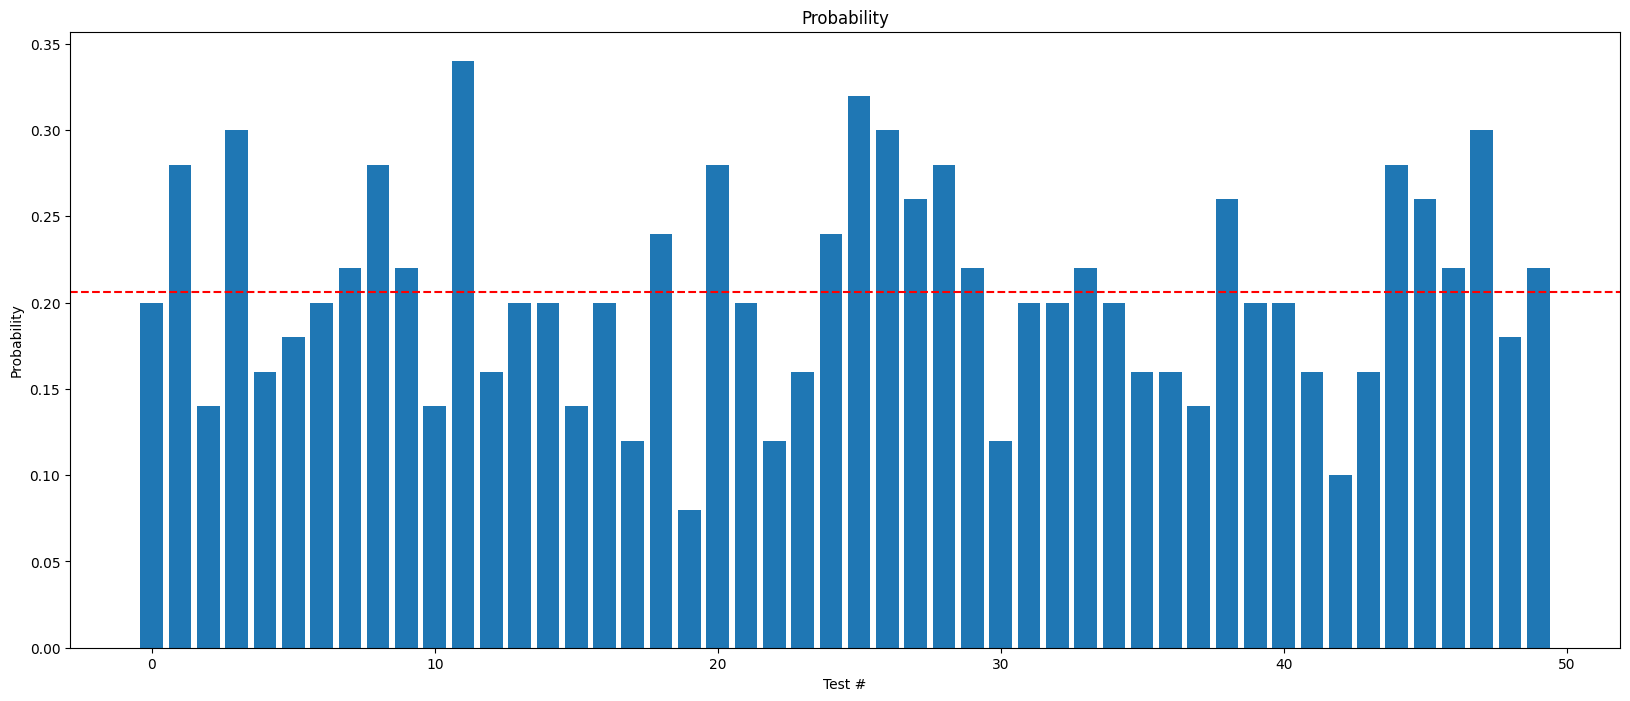

In [110]:
#1.7
#similar to 1.6 but using is_connected() instead of has_cycle(), and two random start and end points will be tested for each graph
#run the experiment 50 times (50 graphs will be tested, 50 times) each graph will have 20 nodes and 20 edges
runs = 50

#store the 50 probabilities in this list to make into a graph after
probabilities = []

for _ in range(runs):
  #x will be tracking how many graphs had cycles
  x = 0

  for _ in range(runs):
    start = []
    end = []

    G = random_graph(20, 20)

    graph = G.get_graph()
    #print(graph)
    #randomly generate integer within length of G
    #go through the keys until finding the one at the random index (for the start point, then repeat for end point)
    num = random.randint(0, len(graph)-1)
    j = 0
    for i in graph.keys():
      if j == num:
        start = i
        break
      j += 1

    num = random.randint(0, len(graph)-1)
    j = 0
    for i in graph.keys():
      if j == num:
        end = i
        break
      j += 1

    #print(start, end, is_connected(G, start, end))
    connected = is_connected(G, start, end)
    if connected:
      x += 1

  # print("The probability is", x, "/ 50 or", x/50)
  probabilities.append(x/50)
draw_show_plot(probabilities)


Reflection:

- The experiment design:

  - 50 random graphs with 20 nodes and 20 edges are created, and since is_connected() needs a start and end point as well, a random start node and end node is selected for each graph.

  - The number of these 50 graphs that were connected is stored out of 50, and then this overall experiment is repeated 50 times to end with 50 probabilities.

- This experiment has 50 iterations per probability calculation, and 50 probabilities are found, and this design was chosen to ensure that enough graphs are tested and enough probabilities are found that the average at the end is more accurate.

- The results for this experiment show that the average probability of a random graph with 20 nodes and 20 edges being connected is around 0.21, which is around 10/50 graphs.


Part 2: Computing minimum vertex cover is a basic combinatorial optimization problem where the goal is to determine a minimum subset of vertices that cover all edges. The jupyter notebook contains a function to compute the minimum vertex cover for an undirected graph. It works for graphs for small node sizes (<30). Implement 3 different approximation algorithms for the Vertex Cover Problem.

In [ ]:
#Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

def is_vertex_cover(G, C):
    for start in G.adj:
        for end in G.adj[start]:
            if not(start in C or end in C):
                return False
    return True

def MVC(G):
    nodes = [i for i in range(G.get_size())]
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover


In [6]:
# checking for vertex cover where graph is using hash map (GraphI)
def is_vertex_cover_hm(graph, C):
  G = graph.get_graph()

  for node in C:
    for n, edges in G.items():
        if node in edges:
            G[n].remove(node)


  for node in C:
      G[node]=[]


  is_vc = True

  for node,edges in G.items():
    if len(edges) != 0:
      is_vc = False
      break

  return is_vc

Part 2.1: Approx1 (graph) takes in an object of Graph and does the following:
1. Start with an empty set C = {}
2. Find the vertex with the highest degree in G, call this vertex v
3. Add v to C
4. Remove all edges incident to node v from G
5. If C is a Vertex Cover return C, else go to Step 2

In [7]:
#Part 2.1
def approx1(G):
  working_copy = {}
  graph = G.get_graph()

  #make a copy of the graph
  for node, edges in graph.items():
    working_copy[node] = edges

  #empty set C
  C = []
  highest = 0
  #v is the vertex of highest degree
  v = []


  while True:
      #find the vertex with the highest degree in G and store in v
      for node, edges in working_copy.items():
          #if the current node has more edges than highest, set v equal to the current node
          #this will result in the node with the highest degree
          if len(edges) > highest:
              highest = len(edges)
              v = node

      highest = 0
      #add v to C
      C.append(v)

      #remove all edges incident to node v from G (working_copy)
      if v in working_copy.keys():
          working_copy[v] = []

      #remove v from values of other nodes (assume that the graph is undirected)
      for vals in working_copy.values():
          if v in vals:
              vals.remove(v)

      #check if C is a vertex cover:
      if is_vertex_cover_hm(G, C):
          break

  return C

# graph = GraphI([['A', 'C'], ['C', 'B'], ['A', 'E'], ['C', 'G'], ['E', 'H'], ['H', 'D']])
# print(graph.get_graph())
# print(approx1(graph))

# print("\n")

# graph2 = GraphI([['A', 'C'], ['C', 'B'], ['A', 'E'], ['C', 'G'], ['E', 'H'], ['H', 'D'], ['C', 'A']])
# print(graph2.get_graph())
# print(approx1(graph2))

# print("\n")
# graph3 = GraphI([['A', 'C'], ['C', 'B'], ['A', 'E'], ['C', 'G'], ['E', 'H'], ['H', 'D'], ['F', 'E'], ['F', 'G']])
# print(graph3.get_graph())
# print(approx1(graph3))


Part 2.2: Approx2(graph) takes as an input, an object of Graph and does the following:
1. Start with an empty set C = {}
2. Select a vertex randomly from G which is not already C, call this vertex v
3. Add v to C
4. If C is a Vertex Cover return C, else go to Step 2

In [8]:
#Part 2.2
def approx2(G):
  working_copy = {}
  graph = G.get_graph()

  #make a copy of the graph
  for node, edges in graph.items():
    working_copy[node] = edges

  #empty set C
  C = []

  while True:
    v = []

    #select a vertex randomly from G which is not already in C, call this vertex v:
    #randomly generate integer within length of G
    #go through the keys until finding the one at the random index
    while True:
      num = random.randint(0, len(graph)-1)
      j = 0

      for i in working_copy.keys():
        if j == num:
          v = i
          break
        j += 1

    #if the random vertex isn't in C, then break to add to C, otherwise keep finding new random vertices until it's not in C
      if v not in C:
        break


    #Add v to C
    C.append(v)

    #If C is a Vertex Cover return C, otherwise repeat above
    if is_vertex_cover_hm(G, C):
      break

  return C

# graph = GraphI([['A', 'C'], ['C', 'B'], ['A', 'E'], ['C', 'G'], ['E', 'H'], ['H', 'D']])
# print(graph.get_graph())
# print(approx2(graph))

# print("\n")

# graph2 = GraphI([['A', 'C'], ['C', 'B'], ['A', 'E'], ['C', 'G'], ['E', 'H'], ['H', 'D'], ['C', 'A']])
# print(graph2.get_graph())
# print(approx2(graph2))

# print("\n")
# graph3 = GraphI([['A', 'C'], ['C', 'B'], ['A', 'E'], ['C', 'G'], ['E', 'H'], ['H', 'D'], ['F', 'E'], ['F', 'G']])
# print(graph3.get_graph())
# print(approx2(graph3))

Part 2.3: Approx3(graph) takes as an input, an object of Graph and does the following:
1. Start with an empty set C = {}
2. Select an edge randomly from G, call this edge (u, v)
3. Add u and v to C
4. Remove all edges incident to u or v from G
5. If C is a Vertex Cover return C, else go to Step 2

Note: When you remove (or perform any other operation on) an edge, do not directly manipulate the graph, instead work on a local copy of the input graph.

In [ ]:
#Part 2.3
def approx3(G):
  working_copy = {}
  graph = G.get_graph()

  #make a copy of the graph
  for node, edges in graph.items():
    working_copy[node] = edges

  #empty set C that will hold the vertices in the vertex cover
  C = []

  #select an edge randomly from G, call this edge (u,v)
  while True:
    v = []
    u = []

    #first randomly find v that isn't in C already
    while True:
      num = random.randint(0, len(working_copy)-1)

      j = 0
      for i in working_copy.keys():
        if j == num:
          v = i
          break
        j += 1

      if v not in C:
        break

    if len(working_copy[v]) == 0:
      #this is if v has no edges, it doesn't need to be added, but C didn't change so just continue to the next iteration
      continue

    else:
      #find another node in v's list of edges
      num = random.randint(0, len(working_copy[v])-1)

      j = 0
      for i in working_copy[v]:
        if j == num:
          u = i
          break
        j += 1


      #add u and v to C
      C.append(u)
      C.append(v)

      #remove all edges incident to u or v from G
      if u in working_copy.keys():
          working_copy[u] = []
      if v in working_copy.keys():
          working_copy[v] = []

      for i in working_copy.values():
          if v in i:
              i.remove(v)
          if u in i:
              i.remove(u)

    #If C is a Vertex Cover return C, else repeat
    if is_vertex_cover_hm(G, C):
      break

  return C

# graph = GraphI([['A', 'C'], ['C', 'B'], ['A', 'E'], ['C', 'G'], ['E', 'H'], ['H', 'D']])
# print(graph.get_graph())
# print(approx3(graph))

# print("\n")

# graph2 = GraphI([['A', 'C'], ['C', 'B'], ['A', 'E'], ['C', 'G'], ['E', 'H'], ['H', 'D'], ['C', 'A']])
# print(graph2.get_graph())
# print(approx3(graph2))

# print("\n")
# graph3 = GraphI([['A', 'C'], ['C', 'B'], ['A', 'E'], ['C', 'G'], ['E', 'H'], ['H', 'D'], ['F', 'E'], ['F', 'G']])
# print(graph3.get_graph())
# print(approx3(graph3))